[2025-06-06 Fiddler](https://thefiddler.substack.com/p/can-you-squeeze-the-bubbles)
====================

Fiddler
-------
A picture of seven squeezed circles, where the center of the middle
circle is on the perimeter of each of the six surrounding circles,
and the center of each of the six surrounding circles is on the
perimeter of the middle circle as well as the perimeter of each of
its two neighboring surrounding circles:

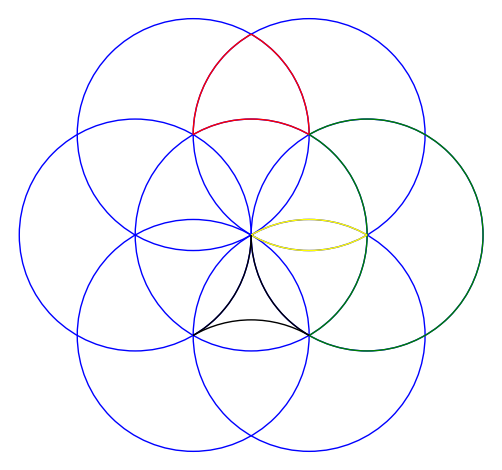

In [1]:
(circle((0,0),1,axes=false)
 + circle((1,0),1)
 + circle((1/2,sqrt(3)/2),1)
 + circle((1/2,-sqrt(3)/2),1)
 + circle((-1,0),1)
 + circle((-1/2,sqrt(3)/2),1)
 + circle((-1/2,-sqrt(3)/2),1)
 + arc((-1/2,sqrt(3)/2),1,color='red',sector=(0,pi/3))
 + arc((1/2,sqrt(3)/2),1,color='red',sector=(2*pi/3,pi))
 + arc((0,0),1,color='red',sector=(pi/3,2*pi/3))
 + arc((1,0),1,color='green',sector=(-2*pi/3,2*pi/3))
 + arc((0,0),1,color='green',sector=(-pi/3,pi/3))
 + arc((1/2,sqrt(3)/2),1,color='yellow',sector=(-2*pi/3,-pi/3))
 + arc((1/2,-sqrt(3)/2),1,color='yellow',sector=(pi/3,2*pi/3))
 + arc((1,0),1,color='black',sector=(pi,4*pi/3))
 + arc((-1,0),1,color='black',sector=(-pi/3,0))
 + arc((0,-sqrt(3)),1,color='black',sector=(pi/3,2*pi/3))
)

The area of the region outlined in red is

In [2]:
Ar = 2*integral(sqrt(1-(x+1/2)^2)+sqrt(3)/2 - sqrt(1-x^2), x, 0, 1/2)
show(Ar)

1/6*pi

The area of the region outlined in green is

In [3]:
Ag = pi/2 + 2*integral(sqrt(1-(x-1)^2) - sqrt(1-x^2), x, 1/2, 1)
show(Ag)

1/3*pi + 1/2*sqrt(3)

So the total enclosed area is

In [4]:
show(pi + 6*(Ag-Ar))

2*pi + 3*sqrt(3)

Extra credit
------------
The area of the region outlined in yellow is

In [5]:
Ay = 4*integral(sqrt(1-x^2)-sqrt(3)/2, x, 0, 1/2)
show(Ay)

1/3*pi - 1/2*sqrt(3)

The area outlined in black is

In [6]:
Ab = Ar - 2*Ay
show(Ab)

-1/2*pi + sqrt(3)

When there are many circles, each circle contains 12 regions like the region
outlined in yellow, and each circle contains 6 regions like the region
outlined in black.

Each region like the region outlined in yellow is contained by 4 circles,
while each region like the region outlined in black is contained by 3
circles, so when $N$ is large, the contained area can be approximated by

In [7]:
N = var('N')
show((N*Ay*12/4+N*Ab*6/3).simplify_full())

1/2*sqrt(3)*N

And since parts of the circles on the perimeter of the region are contained by
fewer circles, this underapproximates the actual area by $\mathcal O(\sqrt N)$.

Further thoughts
----------------
Adding an additional 12 circles around the 7 circles,

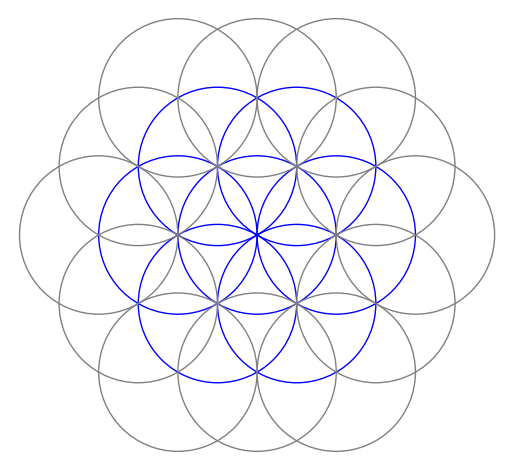

In [8]:
(circle((0,0),1,axes=false)
 + circle((1,0),1)
 + circle((1/2,sqrt(3)/2),1)
 + circle((1/2,-sqrt(3)/2),1)
 + circle((-1,0),1)
 + circle((-1/2,sqrt(3)/2),1)
 + circle((-1/2,-sqrt(3)/2),1)
 + circle((0,sqrt(3)),1,color='gray')
 + circle((1,sqrt(3)),1,color='gray')
 + circle((3/2,sqrt(3)/2),1,color='gray')
 + circle((2,0),1,color='gray')
 + circle((3/2,-sqrt(3)/2),1,color='gray')
 + circle((1,-sqrt(3)),1,color='gray')
 + circle((0,-sqrt(3)),1,color='gray')
 + circle((-1,-sqrt(3)),1,color='gray')
 + circle((-3/2,-sqrt(3)/2),1,color='gray')
 + circle((-2,0),1,color='gray')
 + circle((-3/2,sqrt(3)/2),1,color='gray')
 + circle((-1,sqrt(3)),1,color='gray')
)

In [9]:
A7 = pi + 6*(Ag-Ar)
A19 = A7 + 6*(Ag+Ar-Ay)
show(A19)

3*pi + 9*sqrt(3)

Continuing in the same vein with ever larger hexagonal grids
and comparing their areas to $N\sqrt3/2$ supports the idea that
the area is $N\sqrt3/2 + \mathcal O(\sqrt N)$ for large $N$,

In [10]:
A1 = pi
show(A1,' → ',numerical_approx(A1*2/(sqrt(3)*1)))
A7 = A1 + 6*(Ag-Ar)
show(A7,' → ',numerical_approx(A7*2/(sqrt(3)*7)))
A19 = A7 + 6*(Ag+Ar-Ay)
show(A19,' → ',numerical_approx(A19*2/(sqrt(3)*19)))
A37 = A19 + 6*(Ag+(2*Ar-Ay)+Ar-Ay)
show(A37,' → ',numerical_approx(A37*2/(sqrt(3)*37)))
A61 = A37 + 6*(Ag+2*(2*Ar-Ay)+Ar-Ay)
show(A61,' → ',numerical_approx(A61*2/(sqrt(3)*61)))

pi ' → ' 3.62759872846844

2*pi + 3*sqrt(3) ' → ' 1.89359963670527

3*pi + 9*sqrt(3) ' → ' 1.52014716765291

4*pi + 18*sqrt(3) ' → ' 1.36514580848307

5*pi + 30*sqrt(3) ' → ' 1.28095071544823

In [11]:
def areas():
    radius = 0
    area = pi
    circles = 1
    yield (circles,area)
    while True:
        radius += 1
        area += 6*(Ag-Ar+(radius-1)*(2*Ar-Ay))
        circles += 6*radius
        yield (circles,area)

In [12]:
for (n,a) in areas():
    show((n,a,numerical_approx(a*2/(sqrt(3)*n))))
    if n > 250:
        break

(1, pi, 3.62759872846844)

(7, 2*pi + 3*sqrt(3), 1.89359963670527)

(19, 3*pi + 9*sqrt(3), 1.52014716765291)

(37, 4*pi + 18*sqrt(3), 1.36514580848307)

(61, 5*pi + 30*sqrt(3), 1.28095071544823)

(91, 6*pi + 45*sqrt(3), 1.22819332275616)

(127, 7*pi + 63*sqrt(3), 1.19207237086046)

(169, 8*pi + 84*sqrt(3), 1.16580349010501)

(217, 9*pi + 108*sqrt(3), 1.14584510855399)

(271, 10*pi + 135*sqrt(3), 1.13016969477743)

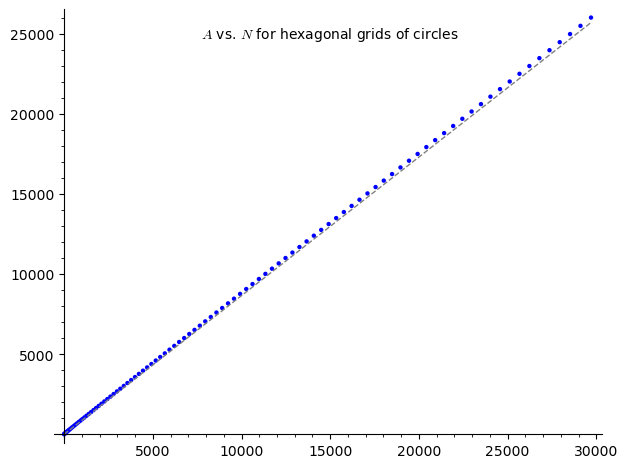

In [13]:
(points([(n,a) for (i,(n,a)) in zip(range(100),areas())])
 + plot(sqrt(3)*x/2, x, 0, 29701,linestyle='dashed',color='gray')
 + text("$A$ vs. $N$ for hexagonal grids of circles",(15000,25000),color='black')
)

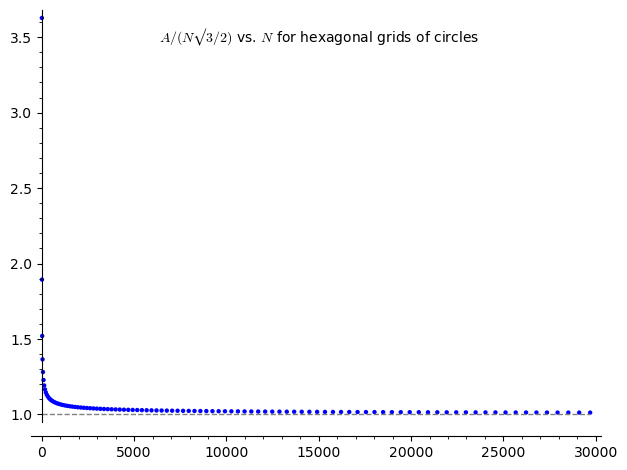

In [14]:
(points([(n,a*2/(sqrt(3)*n)) for (i,(n,a)) in zip(range(100),areas())])
 + plot(1, 0, 29701,linestyle='dashed',color='gray')
 + text("$A/(N√3/2)$ vs. $N$ for hexagonal grids of circles", (15000,3.5),color='black')
)

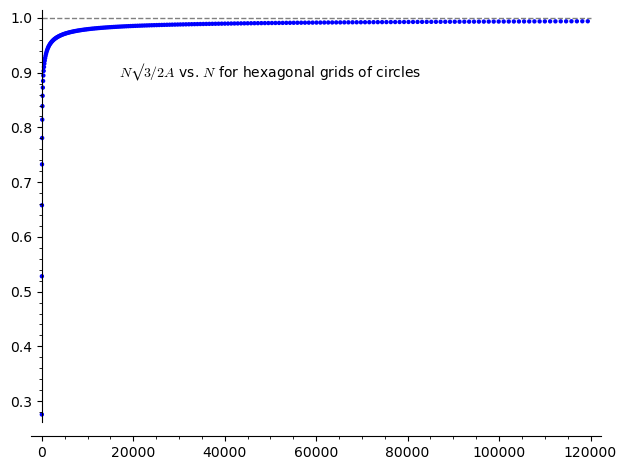

In [17]:
(points([(n,(sqrt(3)*n)/(2*a)) for (i,(n,a)) in zip(range(200),areas())])
 + plot(1, 0, 120000,linestyle='dashed',color='gray')
 + text("$N√3/2A$ vs. $N$ for hexagonal grids of circles", (50000,0.9),color='black')
)